In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


✅ Dataset loaded successfully
   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping      

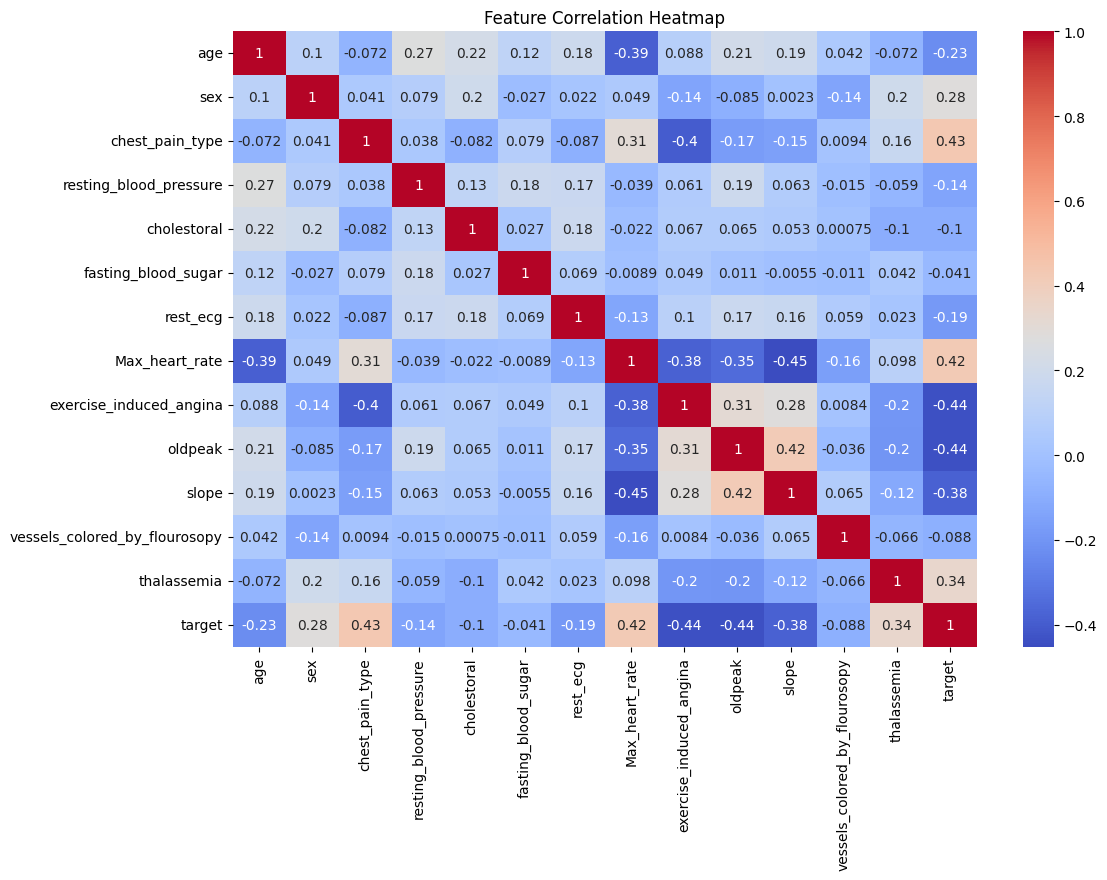

✅ Logistic Regression model trained.

📈 Accuracy: 0.78


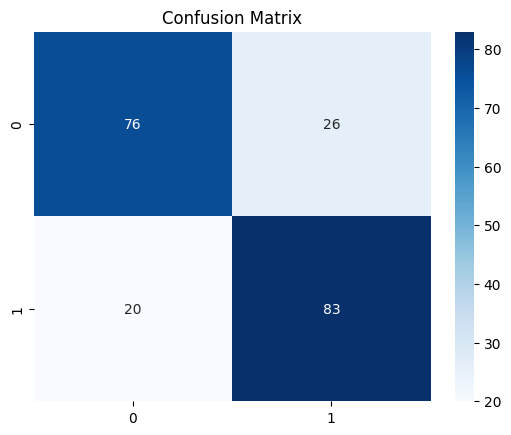

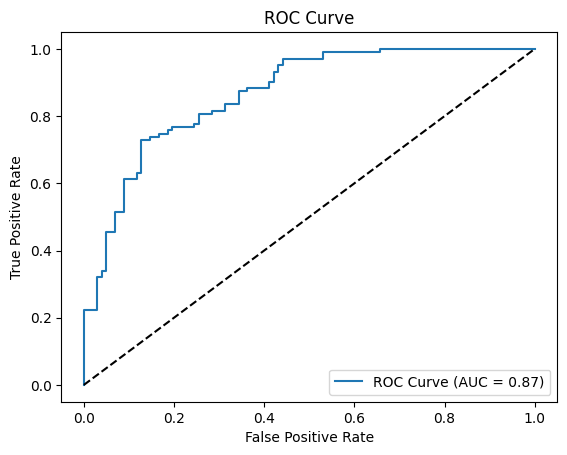

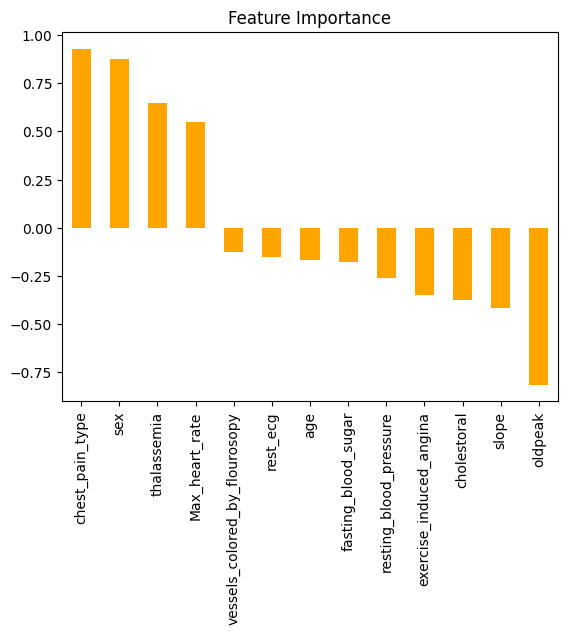

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


##when u upload dataset from kaggle rename it to heart.csv
df = pd.read_csv('heart.csv')
print("Dataset loaded successfully")
print(df.head())

categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
                    'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']

df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
print("Logistic Regression model trained.")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Feature Importance")
plt.show()



In [ ]:


def get_friendly_input():
    print("\nPlease answer the following questions:")
    age = float(input("1. What is your age? "))

    sex_input = input("2. Biological sex (Male/Female): ").strip().lower()
    sex = 1 if sex_input == "male" else 0

    cp_input = input("3. Chest pain level (None / Mild / Moderate / Severe): ").strip().lower()
    cp_map = {"none": 0, "mild": 1, "moderate": 2, "severe": 3}
    cp = cp_map.get(cp_input, 0)

    bp = float(input("4. Resting blood pressure (e.g. 120): "))
    chol = float(input("5. Cholesterol level (e.g. 200): "))

    fbs_input = input("6. Fasting blood sugar > 120? (Yes/No): ").strip().lower()
    fbs = 1 if fbs_input == "yes" else 0

    restecg = 0  # Assuming normal ECG for simplicity

    max_hr = float(input("7. Max heart rate achieved (e.g. 150): "))

    exang_input = input("8. Do you feel chest pain during exercise? (Yes/No): ").strip().lower()
    exang = 1 if exang_input == "yes" else 0

    oldpeak = float(input("9. ST depression induced by exercise (e.g. 1.0): "))

    slope = 2  # Assuming normal slope

    ca = 0  # Assuming no vessels colored

    thal_input = input("10. Any blood disorder like thalassemia? (None / Fixed Defect / Reversible Defect): ").strip().lower()
    thal_map = {"none": 1, "fixed defect": 2, "reversible defect": 3}
    thal = thal_map.get(thal_input, 1)

    # Prepare input row in same order as training features
    user_data = pd.DataFrame([{
        'age': age,
        'sex': sex,
        'chest_pain_type': cp,
        'resting_blood_pressure': bp,
        'cholestoral': chol,
        'fasting_blood_sugar': fbs,
        'rest_ecg': restecg,
        'Max_heart_rate': max_hr,
        'exercise_induced_angina': exang,
        'oldpeak': oldpeak,
        'slope': slope,
        'vessels_colored_by_flourosopy': ca,
        'thalassemia': thal
    }])
    return user_data

# Call and predict
user_input_df = get_friendly_input()
user_input_scaled = scaler.transform(user_input_df)
user_pred = model.predict(user_input_scaled)[0]

if user_pred == 1:
    print("\nYou may be at high risk of heart disease. Please consult a doctor.")
else:
    print("\nYour heart looks healthy! Stay active and keep monitoring.")



🧠 Please answer the following questions:
1. What is your age? 21
2. Biological sex (Male/Female): female
3. Chest pain level (None / Mild / Moderate / Severe): moderate
4. Resting blood pressure (e.g. 120): 150
5. Cholesterol level (e.g. 200): 300
6. Fasting blood sugar > 120? (Yes/No): no
7. Max heart rate achieved (e.g. 150): 100
8. Do you feel chest pain during exercise? (Yes/No): tes
9. ST depression induced by exercise (e.g. 1.0): 2.0
10. Any blood disorder like thalassemia? (None / Fixed Defect / Reversible Defect): none

🟢 Your heart looks healthy! Stay active and keep monitoring.
